# Investigating Poly SVM with a learning curve

**Purpose:**A learning curve tells me if adding more data actually improves the model, or if it's simply a limitation of the data itself. If the two curve converge early on, then that means it's necessary to do feature engineering, since the data has hit it's theoretical limit. If, however, the two curves do not convert at the datasize limit, then I should try another method that can learn from the data better. 

**Methods:**
>1. Load subset data
>2. Run a learning curve method using Poly SVM
>3. Plot the results

**Conclusions:**
* Having more training examples could improve the prediction accuracy with Poly SVM

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

base_path = '/home/lundi/Python/MNIST/'

import time

import sklearn.svm as skl_svm
import sklearn.linear_model as skl_lm
import sklearn.ensemble as skl_ensemble
import sklearn.grid_search as skl_gs
import sklearn.model_selection as skl_model_selection

import data_processor as mdp

data_processor = mdp.MNIST_data_processor()

## 1. Load subset data

In [15]:
X, y = data_processor.load_full_data()

## 2. Run a learning curve method using Poly SVM

In [23]:
train_sizes, train_scores, test_scores = skl_model_selection.learning_curve(
        skl_svm.SVC(kernel='poly'), X, y, train_sizes=[100, 500, 2500, 7500, 12500, 20000, 33000], cv=5, n_jobs = 5)

## 3. Plot the results

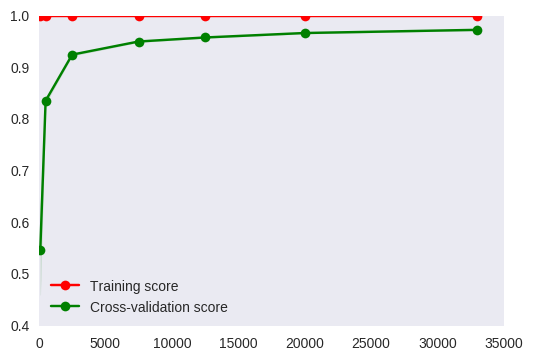

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

#### This indicates that having more training examples could improve the prediction accuracy